In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
prim_dataset = pd.read_csv('Trestbps_Thalach - Heart disease.csv')
keep_cols = ['trestbps','thalach','heart_disease']
data = prim_dataset[keep_cols]
data.head()

,trestbps,thalach,heart_disease
0,145,150,0
1,160,108,1
2,120,129,1
3,130,187,0
4,130,172,0


In [27]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X
                                                   , y
                                                   , test_size = 0.25
                                                   , random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1)
                     , y_test.reshape(len(y_test),1))
                    ,1))

[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [32]:
beta_0 = classifier.intercept_[0]
beta_1 = classifier.coef_[0][0]
beta_2 = classifier.coef_[0][1]

print(f"Model Equation: P(y=1) = 1 / (1 + e^(-({beta_0:.4f} + ({beta_1:.4f} * X1) + ({beta_2:.4f} * X2))))")

Model Equation: P(y=1) = 1 / (1 + e^(-(-0.1888 + (0.4159 * X1) + (-1.0388 * X2))))


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[29 10]
 [17 19]]


0.64

C:\Users\Wackoy\AppData\Local\Temp\ipykernel_8356\4134294859.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0]


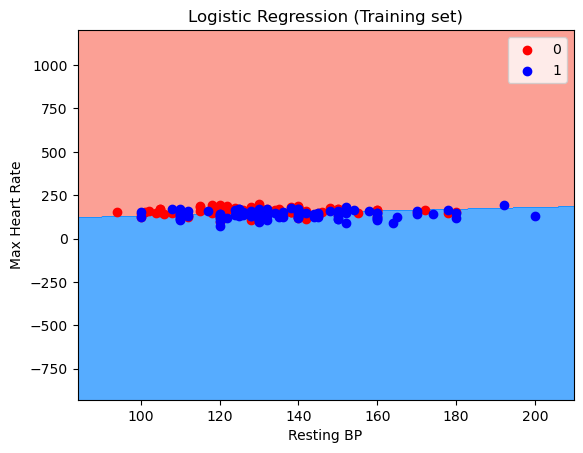

In [36]:
X_set, y_set = sc.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10
                               , stop = X_set[:, 0].max() + 10
                               , step = 0.25)
                     ,np.arange(start = X_set[:, 1].min() - 1000
                                , stop = X_set[:, 1].max() + 1000
                                , step = 0.25))

plt.contourf(X1
            , X2
            , classifier.predict(sc.transform(np.array([X1.ravel()
                                                        , X2.ravel()]).T)).reshape(X1.shape)
            , alpha = 0.75
            , cmap = ListedColormap(('salmon'
                                    , 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0]
                , X_set[y_set == j, 1]
                , c= ListedColormap(('red', 'blue'))(i)
                , label = j)
    
plt.title("Logistic Regression (Training set)")
plt.xlabel("Resting BP")
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()

C:\Users\Wackoy\AppData\Local\Temp\ipykernel_8356\1337763326.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0]


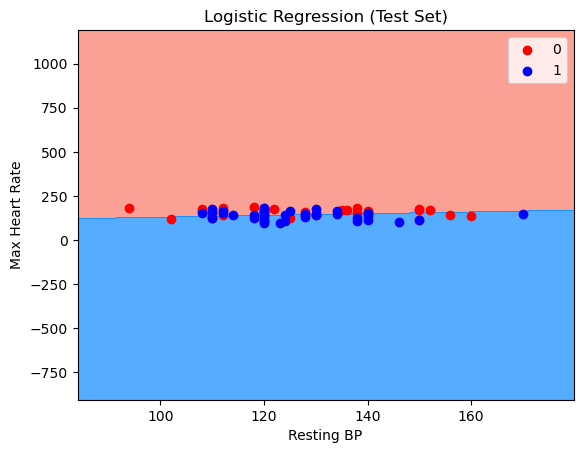

In [37]:
X_set, y_set = sc.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10
                               , stop = X_set[:, 0].max() + 10
                               , step = 0.25)
                     ,np.arange(start = X_set[:, 1].min() - 1000
                                , stop = X_set[:, 1].max() + 1000
                                , step = 0.25))

plt.contourf(X1
            , X2
            , classifier.predict(sc.transform(np.array([X1.ravel()
                                                        , X2.ravel()]).T)).reshape(X1.shape)
            , alpha = 0.75
            , cmap = ListedColormap(('salmon'
                                    , 'dodgerblue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0]
                , X_set[y_set == j, 1]
                , c= ListedColormap(('red', 'blue'))(i)
                , label = j)
    
plt.title("Logistic Regression (Test Set)")
plt.xlabel("Resting BP")
plt.ylabel('Max Heart Rate')
plt.legend()
plt.show()